# EDA & Data Cleaning

In [26]:
import pandas as pd
import numpy as np
import yaml
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [27]:
data_raw = pd.read_csv("../data/raw/DataCoSupplyChainDataset.csv", encoding='latin-1')
data_raw

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/15/2018 11:24,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 3:40,Standard Class
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 1:34,Second Class
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 21:00,Standard Class
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,Caguas,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/18/2016 20:18,Standard Class


In [28]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

## Outlier's Check

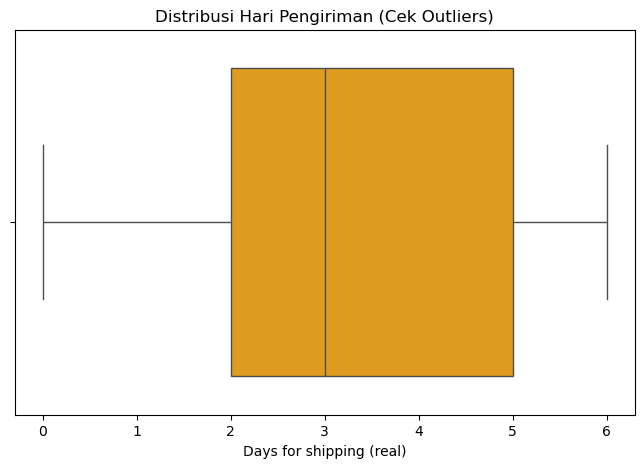

In [25]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=data_clean['Days for shipping (real)'], color='orange')
plt.title('Distribusi Hari Pengiriman (Cek Outliers)')
plt.show()

## Distributions Check

## Handle Missing Values

In [29]:
data_raw.isna().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


In [30]:
data_raw.columns[data_raw.isna().any()].tolist()

['Customer Lname', 'Customer Zipcode', 'Order Zipcode', 'Product Description']

/var/folders/5k/ryl7b4vx7nzdd92vwrlw_64r0000gn/T/ipykernel_9961/390598188.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=null_counts_filtered.index, y=null_counts_filtered.values, palette='viridis')


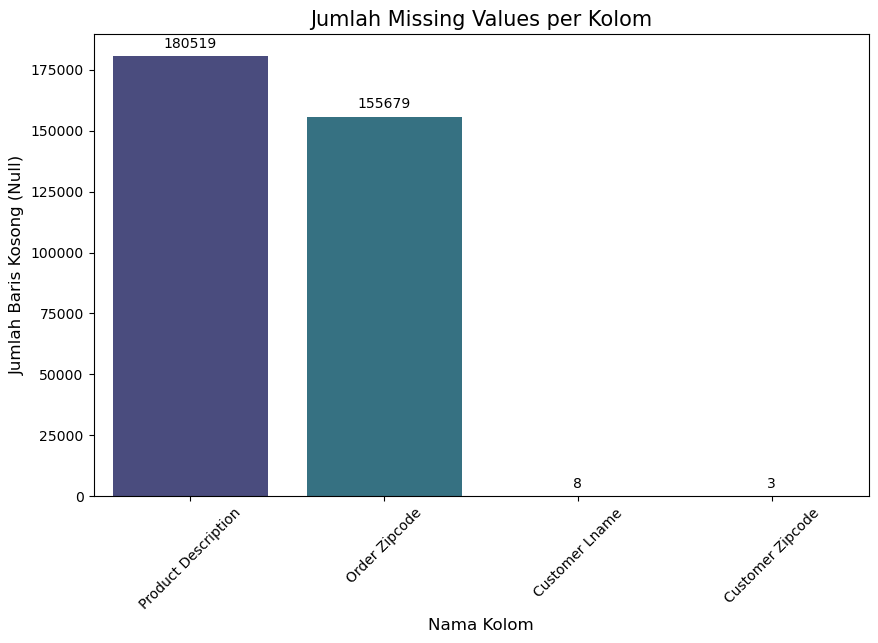

In [31]:

null_counts = data_raw.isna().sum()
null_counts_filtered = null_counts[null_counts > 0]
null_counts_filtered = null_counts_filtered.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=null_counts_filtered.index, y=null_counts_filtered.values, palette='viridis')


plt.title('Jumlah Missing Values per Kolom', fontsize=15)
plt.ylabel('Jumlah Baris Kosong (Null)', fontsize=12)
plt.xlabel('Nama Kolom', fontsize=12)
plt.xticks(rotation=45) 


for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.show()

### Hyptothesis of MCAR, MAR, or MCAR @ Customer Zipcode && @ Order Zipcode

In [32]:
null_zip = data_raw[data_raw['Customer Zipcode'].isna()]
print("Negara dengan Zipcode Null terbanyak:")
print(null_zip['Customer Country'].value_counts().head())

Negara dengan Zipcode Null terbanyak:
Customer Country
EE. UU.    3
Name: count, dtype: int64


In [33]:
null_order_zip = data_raw[data_raw['Order Zipcode'].isna()]

# Lihat sebaran negaranya (Top 10)
print("Negara dengan Order Zipcode Null terbanyak:")
print(null_order_zip['Order Country'].value_counts().head(10))

Negara dengan Order Zipcode Null terbanyak:
Order Country
Francia        13222
México         13172
Alemania        9564
Australia       8497
Brasil          7987
Reino Unido     7302
China           5758
Italia          4989
India           4783
Indonesia       4204
Name: count, dtype: int64


In [34]:
cols_check = ['Order Zipcode', 'Order City', 'Order State', 'Order Country']
check_completeness = data_raw[data_raw['Order Zipcode'].isna()][cols_check]

print(f"Total baris dengan Order Zipcode Null: {len(check_completeness)}")
print(f"Dari yang null itu, jumlah Order City yang JUGA null: {check_completeness['Order City'].isna().sum()}")
print(f"Dari yang null itu, jumlah Order State yang JUGA null: {check_completeness['Order State'].isna().sum()}")

Total baris dengan Order Zipcode Null: 155679
Dari yang null itu, jumlah Order City yang JUGA null: 0
Dari yang null itu, jumlah Order State yang JUGA null: 0


In [35]:
cols_to_drop = ['Customer Lname', 'Product Description', 'Order Zipcode']
data_clean = data_raw.drop(columns=cols_to_drop)
data_clean = data_clean.dropna()

print("Sisa Missing Values setelah pembersihan:")
print(data_clean.isna().sum().sum()) 
print(f"Ukuran Data Sekarang: {data_clean.shape}")

Sisa Missing Values setelah pembersihan:
0
Ukuran Data Sekarang: (180516, 50)


In [36]:
data_clean.columns[data_clean.isna().any()].tolist()

[]

## Standarization || Formatting data

In [37]:
data_clean

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order State,Order Status,Product Card Id,Product Category Id,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,Java Occidental,COMPLETE,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,Rajastán,PENDING,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,Rajastán,CLOSED,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,Queensland,COMPLETE,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,Queensland,PENDING_PAYMENT,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/15/2018 11:24,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,...,Shanghái,CLOSED,1004,45,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 3:40,Standard Class
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,...,Osaka,COMPLETE,1004,45,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 1:34,Second Class
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,...,Australia del Sur,PENDING,1004,45,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 21:00,Standard Class
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,Caguas,...,Australia del Sur,PENDING_PAYMENT,1004,45,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/18/2016 20:18,Standard Class


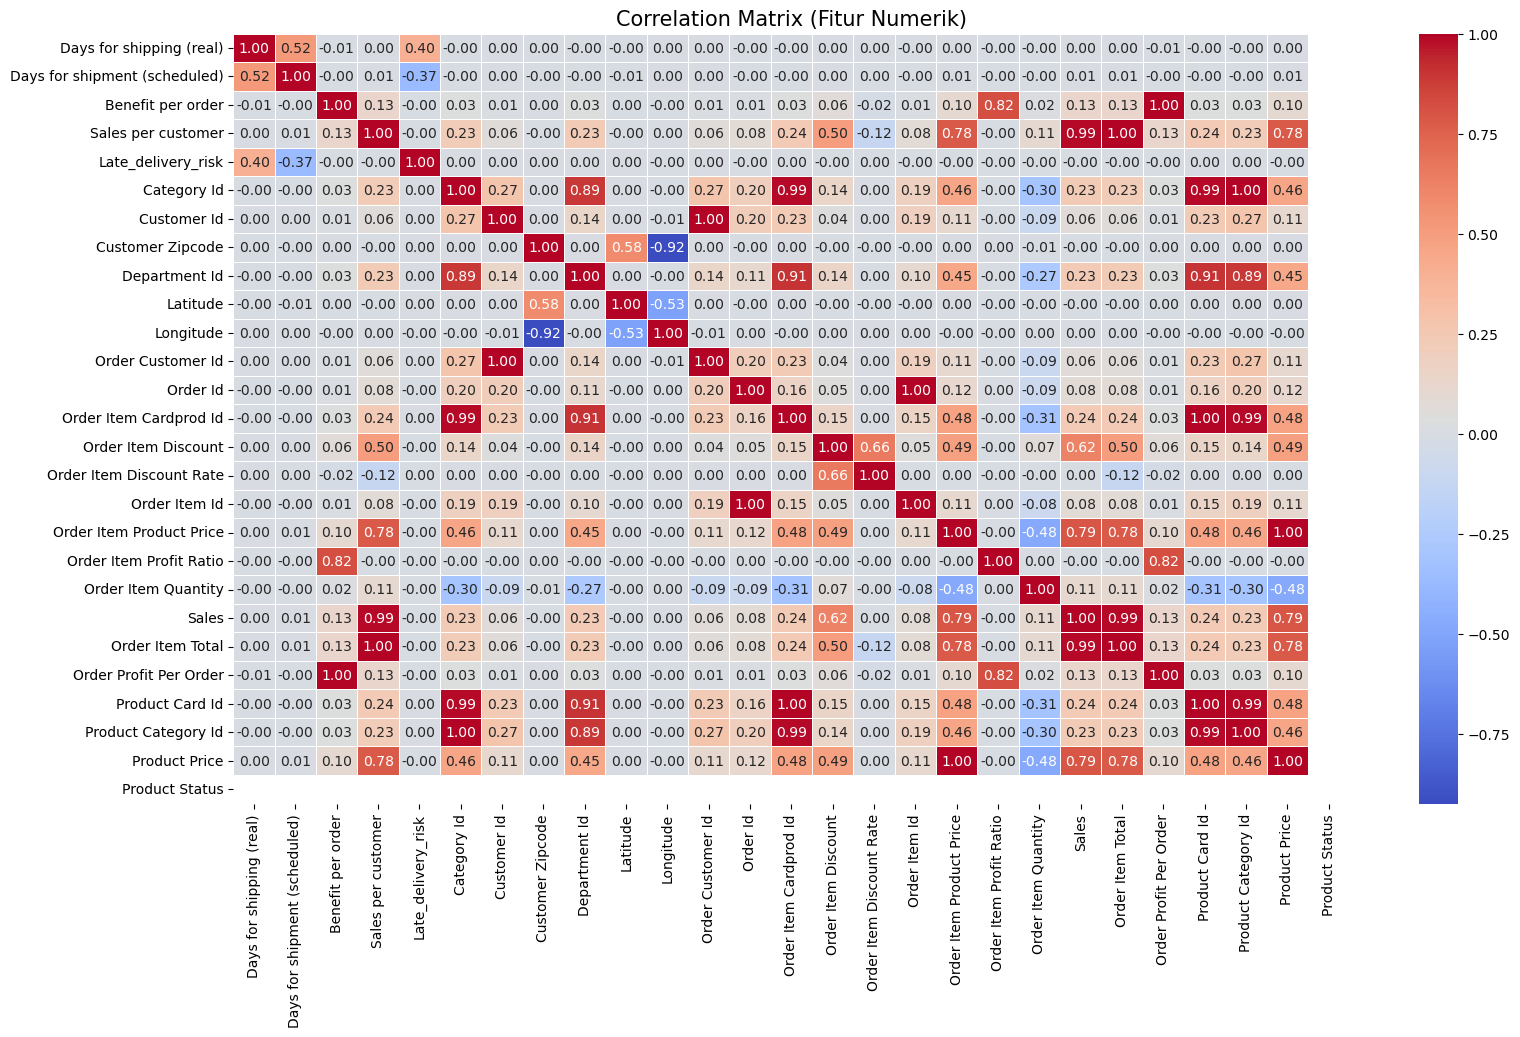

In [38]:
numeric_cols = data_clean.select_dtypes(include=[np.number])

# 2. Hitung korelasi
correlation_matrix = numeric_cols.corr()

# 3. Visualisasi Heatmap
plt.figure(figsize=(18, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix (Fitur Numerik)', fontsize=15)
plt.show()

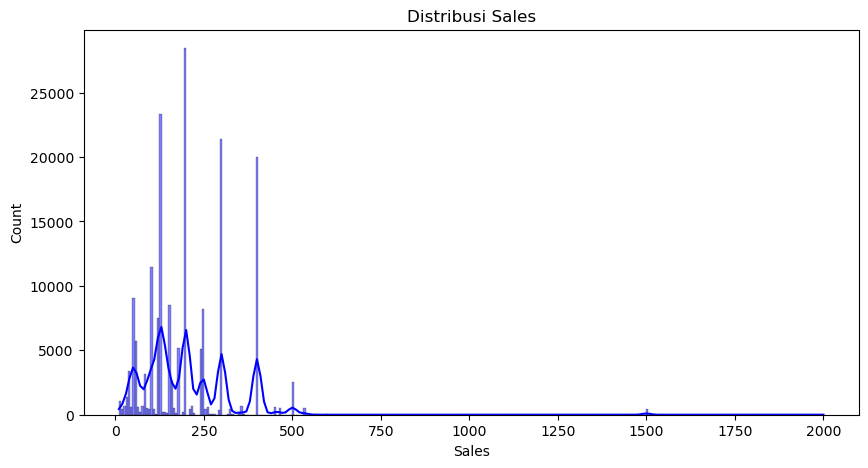

In [41]:
plt.figure(figsize=(10, 5))
sns.histplot(data_clean['Sales'], kde=True, color='blue')
plt.title('Distribusi Sales')
plt.show()

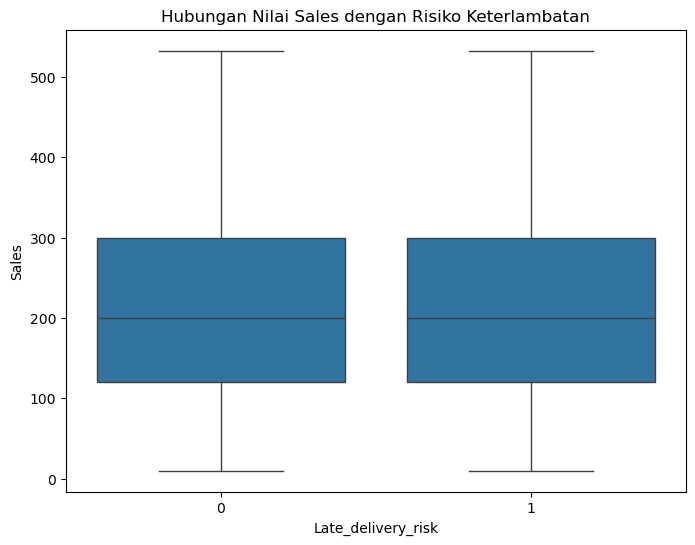

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x='Late_delivery_risk', y='Sales', data=data_clean, showfliers=False)
plt.title('Hubungan Nilai Sales dengan Risiko Keterlambatan')
plt.show()

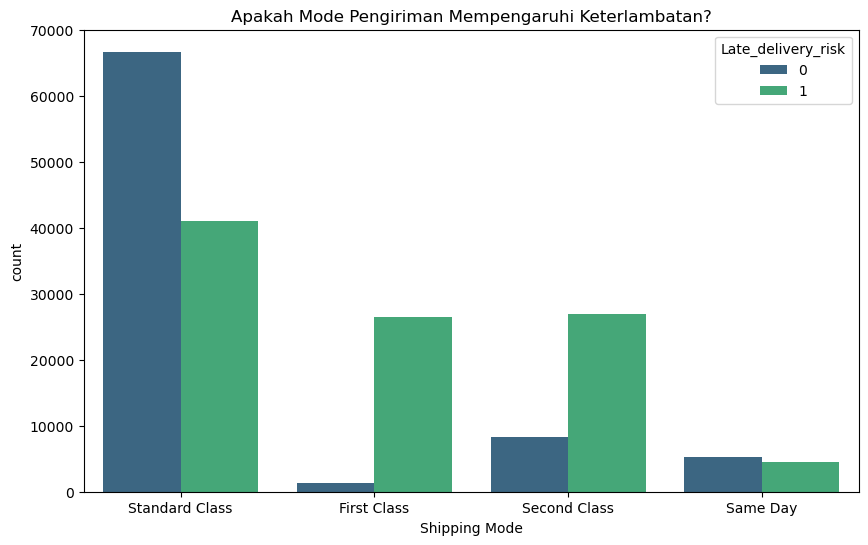

Shipping Mode
First Class       95.322331
Same Day          45.743042
Second Class      76.632781
Standard Class    38.072390
Name: Late_delivery_risk, dtype: float64


In [43]:
# Cek hubungan Mode Pengiriman dengan Risiko Telat
# Biasanya ini faktor penentu paling kuat
plt.figure(figsize=(10, 6))
sns.countplot(x='Shipping Mode', hue='Late_delivery_risk', data=data_clean, palette='viridis')
plt.title('Apakah Mode Pengiriman Mempengaruhi Keterlambatan?')
plt.show()

# Cek persentase keterlambatan per mode
print(data_clean.groupby('Shipping Mode')['Late_delivery_risk'].mean() * 100)

/var/folders/5k/ryl7b4vx7nzdd92vwrlw_64r0000gn/T/ipykernel_9961/3678130846.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Shipping Mode', y='delivery_gap', data=data_clean, palette='viridis')


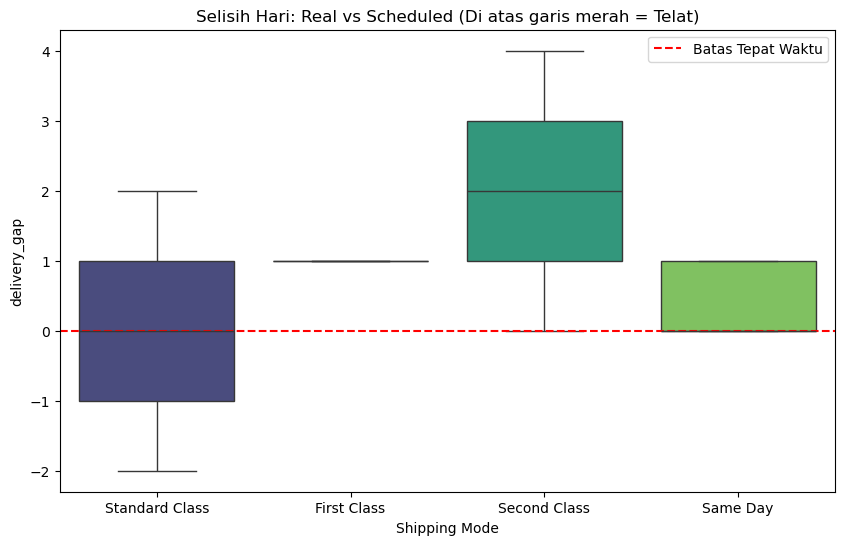

                Days for shipment (scheduled)  Days for shipping (real)
Shipping Mode                                                          
First Class                               1.0                  2.000000
Same Day                                  0.0                  0.478279
Second Class                              2.0                  3.990828
Standard Class                            4.0                  3.995907


In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Jika positif (+), berarti telat. Jika negatif (-), berarti lebih cepat.
data_clean['delivery_gap'] = data_clean['Days for shipping (real)'] - data_clean['Days for shipment (scheduled)']

plt.figure(figsize=(10, 6))
sns.boxplot(x='Shipping Mode', y='delivery_gap', data=data_clean, palette='viridis')
plt.axhline(0, color='red', linestyle='--', label='Batas Tepat Waktu') # Garis batas 0
plt.title('Selisih Hari: Real vs Scheduled (Di atas garis merah = Telat)')
plt.legend()
plt.show()

print(data_clean.groupby('Shipping Mode')[['Days for shipment (scheduled)', 'Days for shipping (real)']].mean())